In [9]:
import numpy as np
import pandas as pd
import re

In [18]:
cleaned_data_directory = '../cleaned/'
merged_data_directory = '../merged/'
filename = 'Enrollment Highlights 2021-22 MR - Program by Rank.xlsx - Table 1.csv'

df = pd.read_csv( f'{cleaned_data_directory}/{filename}' )
school_name_df = pd.read_csv( f'{merged_data_directory}/sfusd-school-names.csv' )
program_code_df = pd.read_csv( f'{merged_data_directory}/sfusd-program-codes.csv' )

In [63]:
program_code_df \
    [lambda _df: _df.program_name.fillna( ' ' ).str.contains( 'otion' )] \
    .program_name \
    .unique()

array(['ED: SDC - Emotionally Disturbed'], dtype=object)

In [62]:
program_code_map = {
    'Gen Ed': 'GE: General Education',
    'SDC - Mild to Moderate': 'MM: SDC - Mild to Moderate',
    'SDC - Moderate to Severe': 'MS: SDC - Moderate to Severe',
    'Chinese Biliteracy': 'CB: Cantonese Biliteracy',
    'Chinese Immersion (Cantonese)': 'CN: Cantonese Immersion (Cantonese Speakers)',
    'Chinese Immersion (Non-English)': 'CT: Cantonese Immersion (All others)',
    'Chinese Immersion (Non-Native)': 'CE: Cantonese Immersion (All English)',
    'Korean Immersion (Korean)': 'Korean Immersion (Korean Speakers)',
    'Korean Immersion (Non-Native)': 'KE: Korean Immersion (Non-Native)',
    'Japanese Bilingual Bicultural - Japanese': 'JN: Japanese Bilingual Bicultural Program - Japanese Cohort',
    'Japanese Bilingual Bicultural - English': 'JE: Japanese Bilingual Bicultural Program - English Cohort',
    'SDC - Mild/Mod Autism Focus': 'AF: SDC - Mild/Mod Autism Focus'
}

df \
    .rename( columns = { 'SchoolName': 'school_name', 'Program': 'program_name', 'Grade': 'grade' } ) \
    .drop( [ '6-10', 'Grand Total' ], axis = 1 ) \
    .assign( grade = lambda _df: _df.grade.apply( lambda grade: grade.split( ' ' )[0] ) ) \
    .assign( grade = lambda _df: np.where( _df.grade.isin( [ 'TK', 'K' ] ), _df.grade, _df.grade.apply( lambda grade: re.sub( r'[^\d]+', '', grade ) ) ) ) \
    .assign( school_name = lambda _df: np.where( _df.school_name == 'Drew (Dr Charles) College Preparatory Academ', 'Drew (Dr Charles) College Preparatory Academy ES', _df.school_name ) ) \
    .merge( school_name_df, on = 'school_name', how = 'left' ) \
    .assign( og_program_name = lambda _df: _df.program_name ) \
    .assign( program_name = lambda _df: _df.program_name.map( program_code_map ) ) \
    .merge(
        program_code_df
           .query( 'application_year == 2022' ).drop( 'application_year', axis = 1 ),
        on = [ 'school_id', 'program_name' ],
        how = 'left'
    ) \
    [lambda _df: pd.isnull( _df.program_code )] \
    .tail( 20 )
# check for null school_id
#school_id,program_code,application_year,grade,choice_lower,choice_upper,requests

,grade,program_name,school_name,1st,2nd,3rd,4th,5th,6,7,8,9,10,11-25,26+,school_id,og_program_name,program_code
232,6,NaN,Aptos MS,5.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,431,SDC - Severely Autistic,NaN
233,6,NaN,Francisco MS,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,546,SDC - Severely Autistic,NaN
234,6,NaN,Giannini (A.P.) MS,5.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,404,SDC - Severely Autistic,NaN
235,6,NaN,Roosevelt MS,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,797,SDC - Severely Autistic,NaN
236,6,NaN,Denman (James) MS,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,632,SDC - Social-Emotional/Behavioral Enhanced,NaN
237,6,NaN,Francisco MS,3.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0,0,546,SDC - Social-Emotional/Behavioral Enhanced,NaN
238,6,NaN,Hoover (Herbert) MS,1.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,607,SDC - Social-Emotional/Behavioral Enhanced,NaN
239,6,NaN,Lick (James) MS,2.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,634,SDC - Social-Emotional/Behavioral Enhanced,NaN
240,6,NaN,Presidio MS,3.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,778,SDC - Social-Emotional/Behavioral Enhanced,NaN
241,6,NaN,Buena Vista Horace Mann K-8,123.0,46.0,22.0,8.0,1.0,4.0,2.0,NaN,2.0,NaN,0,0,618,Spanish Immersion (Spanish),NaN


In [56]:
program_code_df \
    [lambda _df: _df.school_id == 420] \
    [lambda _df: _df.application_year == "2022"]

,school_id,application_year,program_code,program_name


In [85]:
#
# Scratch
#
v = 1
w_H = 10
w_L = 1
mu_H = 1 / 2
mu_L = 1 - mu_H

def obj ( rg ):
    r, g = rg
    pi_H = np.maximum( np.minimum( r / ( v * w_H - g ), 1 ), 0 )
    pi_L = np.maximum( np.minimum( r / ( v * w_L - g ), 1 ), 0 )

    return -\
        ( mu_L * ( 1 - np.power( pi_L, 2 ) ) + mu_H * ( 1 - np.power( pi_H, 2 ) ) ) \
        / ( mu_L * ( 1 - pi_L ) + mu_H * ( 1 - pi_H ) )

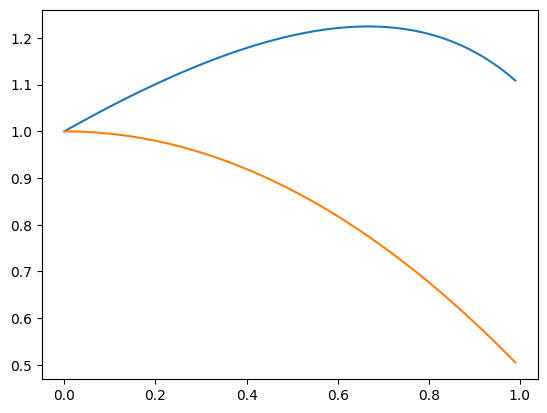

In [89]:
import matplotlib.pyplot as plot

rs = np.arange( start = 0, stop = w_L * v, step = 1e-2 )

pi_H = rs / ( v * w_H )
pi_L = rs / ( v * w_L )

numerator = mu_L * ( 1 - ( rs / ( v * w_L ) ) ** 2 ) + mu_H * ( 1 - ( rs / ( v * w_H ) ) ** 2 )
denominator = mu_L * ( 1 - ( rs / ( v * w_L ) ) ) + mu_H * ( 1 - ( rs / ( v * w_H ) ) )

numerator = 1 - mu_L * pi_L ** 2 - mu_H * pi_H ** 2
denominator = 1 - mu_L * pi_L - mu_H * pi_H

plot.plot( rs, numerator / denominator )
plot.plot( rs, numerator )

In [68]:
from scipy import optimize

res = optimize.minimize( obj, [ 0.3, 0.3 ] )

/var/folders/lr/v7klkd8j671bd11k9l_nvwcm0000gn/T/ipykernel_10279/1618431540.py:15: RuntimeWarning: invalid value encountered in scalar divide
  return -\
/var/folders/lr/v7klkd8j671bd11k9l_nvwcm0000gn/T/ipykernel_10279/1618431540.py:15: RuntimeWarning: invalid value encountered in scalar divide
  return -\


In [69]:
res

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: -1.2797408119874456
        x: [ 3.000e-01  3.000e-01]
      nit: 0
      jac: [-8.236e-01 -2.544e-01]
 hess_inv: [[1 0]
            [0 1]]
     nfev: 36
     njev: 9